In [502]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
import seaborn as sns

Let's download the datasets

In [503]:
column_names_movies = ['Wiki_id', 'FB_id', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Country', 'Genres']
df_movies = pd.read_csv('MovieSummaries/MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_names_movies)

df_movies.head()

,Wiki_id,FB_id,Movie_name,Release_date,Revenue,Runtime,Languages,Country,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [504]:
column_names_characters = ['Wiki_id', 'FB_id', 'Date_of_release', 'Character_name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age_at_release', 'FB_character_map', 'jsp 1', 'jsp 2']
df_characters = pd.read_csv('MovieSummaries/MovieSummaries/character.metadata.tsv', sep='\t', header=None, names=column_names_characters)

df_characters.head()

,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


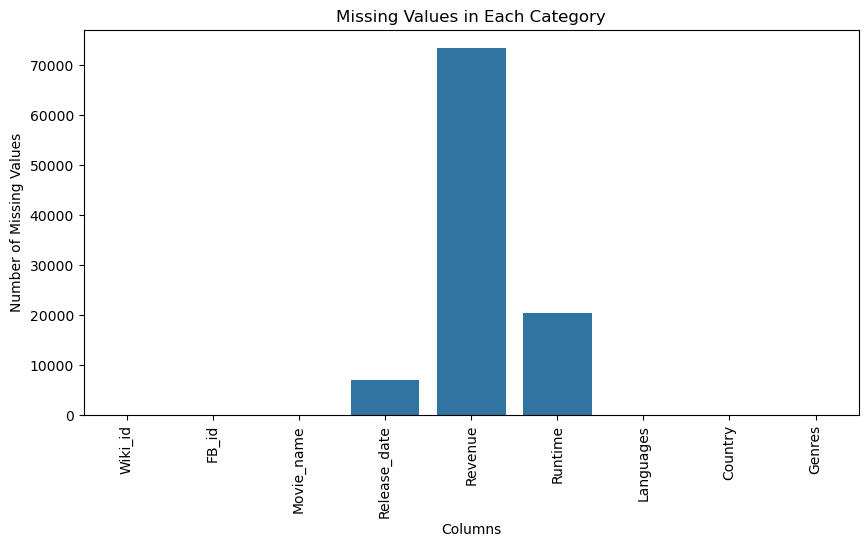

In [505]:
plt.figure(figsize=(10,5))
missing_values = df_movies.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category')
plt.show()

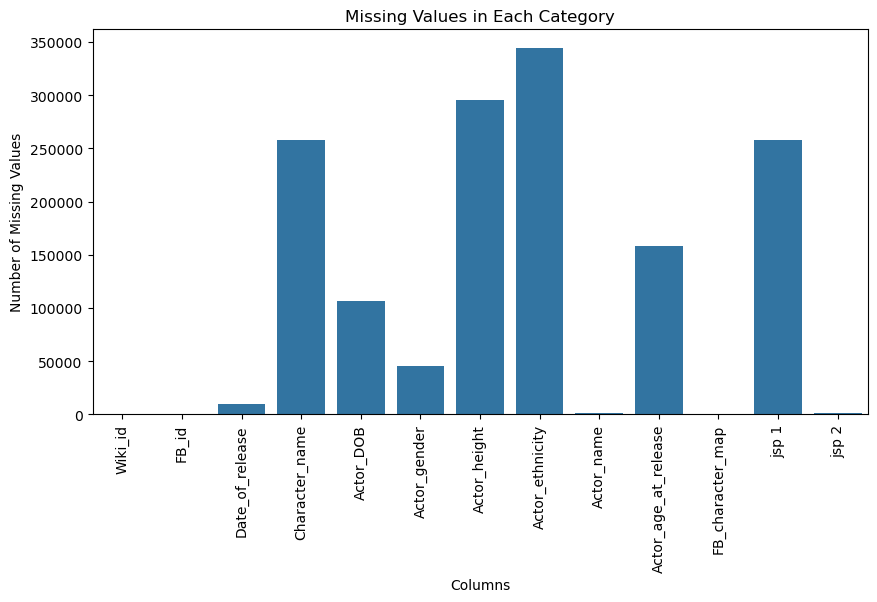

In [506]:
plt.figure(figsize=(10,5))
missing_values = df_characters.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category')
plt.show()

Now, we want to eliminate the common words in the names:

1. Let's eliminate the characters whose names are not documented.
2. Let's eliminate the common words using the spacy library.

(192794, 13)
(192794, 13)


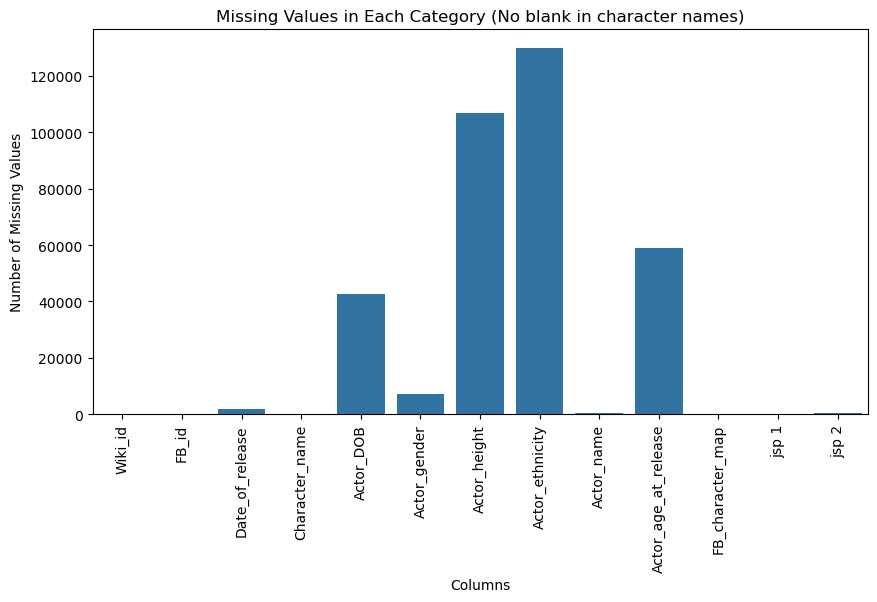

In [524]:
#1

print(df_characters.shape)
df_characters = df_characters.dropna(subset=['Character_name'])
print(df_characters.shape)

plt.figure(figsize=(10,5))
missing_values = df_characters.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Category (No blank in character names)')
plt.show() 

In [508]:
import spacy

# Charger le modèle de langue anglaise
nlp = spacy.load("en_core_web_sm")

import nltk
nltk.download('words')
from nltk.corpus import words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zacbo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [509]:
#2
# Liste des mots anglais
english_words = set(words.words())                                                        # Liste de 235892 mots anglais   
invalid_chars = ['-', '/', '.', ',',"'", '"', '#',"(",')','0','1','2','3','4','5','6','7','8','9']
def filter_non_english_names(name):
    words_in_name = name.split()                                                             # Sépare le nom en mots individuels
    filtered_words = [word for word in words_in_name if word.lower() not in english_words and all(char not in word for char in invalid_chars)]   # Filtre les mots qui ne sont pas dans la liste des mots anglais et ceux qui contiennent '-' ou '/'
    return ' '.join(filtered_words)                                                          # Recrée la chaîne de caractères avec les mots filtrés


# Exemple de texte
text = "General record chinese boyfriend store clerk Soldier tea olivier Camille"
result = filter_non_english_names(text)
print(result)

sample = df_characters.sample(150000)
sample.head()

chinese boyfriend olivier Camille


,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
345806,28433187,/m/0crh528,2011-04-09,Missing Girl,NaN,NaN,NaN,NaN,Juliette Chloe,NaN,/m/0kfc6k4,/m/0kfc6k7,/m/0kfc6kg
5434,8545243,/m/0277cz_,1966,Mme de Chelles,1929-10-11,F,NaN,NaN,Liselotte Pulver,36.0,/m/0b_l8f8,/m/0c1m9bk,/m/0cq_4s
424318,68145,/m/0hvcr,1927,Jakie Rabinowitz,1886-05-26,M,1.73,/m/041rx,Al Jolson,NaN,/m/0k5j4q,/m/047y08r,/m/01mgtn4
418224,22945659,/m/0642cwk,1979-09-20,Szerelo,1924-10-04,M,NaN,NaN,Ferenc Bencze,54.0,/m/0n1_435,/m/0n1_49k,/m/0n1_438
118419,22078075,/m/05p0jh5,1958-12-19,Un viaggiatore,1912-10-14,M,NaN,NaN,Mario Passante,46.0,/m/0kb1yfh,/m/0kb224r,/m/0b_65m3


In [510]:
#values_unfiltered = sample['Character_name'].value_counts()
#print(values_unfiltered)

In [511]:
sample_filtered = sample.copy()
sample_filtered['Character_name']=sample_filtered['Character_name'].apply(filter_non_english_names)
#sample_filtered.head()

In [512]:
#values_filtered = sample_filtered['Character_name'].value_counts()
#print(values_filtered)

In [513]:
deleted_names = sample[sample_filtered['Character_name']==values_filtered.index[0]]
print(deleted_names.shape)
deleted_names.head(5)
#print(values.index[0])

(41087, 13)


,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
345806,28433187,/m/0crh528,2011-04-09,Missing Girl,NaN,NaN,NaN,NaN,Juliette Chloe,NaN,/m/0kfc6k4,/m/0kfc6k7,/m/0kfc6kg
138847,17908468,/m/047p7fr,2009-01-18,Mark,1981-09-17,M,1.8,NaN,Griff Furst,27.0,/m/08ns_cb,/m/08ns_cf,/m/05p2qp8
98209,4845813,/m/03bxgk5,2011-02-02,The Storyteller,NaN,M,NaN,NaN,Roger Fanter,NaN,/m/0hpf74b,/m/0j1v3vc,/m/0gbwrmc
111596,25862293,/m/09v496n,1991-12-18,Marcel,1952-11-02,M,NaN,NaN,Michel Boujenah,39.0,/m/0n9bvkz,/m/0n9bvl1,/m/052298k
441191,21019986,/m/05b477t,1974-01-21,Daisy,1939-07-01,F,1.7,NaN,Karen Black,34.0,/m/05cp7lb,/m/0j1055h,/m/01wmcbg


In [514]:
kept_names = sample_filtered[sample_filtered['Character_name']!=values_filtered.index[0]]
kept_names.head(5)
#print(values.index[0])
print(kept_names.shape)

(108913, 13)


Gardons que les noms en 1 seul mot

In [515]:
kept_names = kept_names[kept_names['Character_name'].apply(lambda name: ' ' not in name)]
print(kept_names.shape)
kept_names.head(5)

(76479, 13)


,Wiki_id,FB_id,Date_of_release,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_release,FB_character_map,jsp 1,jsp 2
418224,22945659,/m/0642cwk,1979-09-20,Szerelo,1924-10-04,M,NaN,NaN,Ferenc Bencze,54.0,/m/0n1_435,/m/0n1_49k,/m/0n1_438
118419,22078075,/m/05p0jh5,1958-12-19,viaggiatore,1912-10-14,M,NaN,NaN,Mario Passante,46.0,/m/0kb1yfh,/m/0kb224r,/m/0b_65m3
359404,177906,/m/0184tc,1986-06-27,Firey,1958,M,NaN,NaN,Ron Mueck,28.0,/m/0hgc7_4,/m/0hgc7_7,/m/032fsd
254090,25491,/m/06cgf,1975-08-14,Transylvanians,1951-10-01,M,NaN,NaN,Perry Bedden,23.0,/m/04p2tdw,/m/0h5n8f6,/m/04p2tdz
94001,31252141,/m/0gjb19_,NaN,Jennene,1917-09-18,F,1.4986,NaN,June Foray,NaN,/m/0gx7lt0,/m/0hyq6_g,/m/019803


In [516]:
kept_names['name_length'] = kept_names['Character_name'].apply(lambda name: len(name))
kept_names.groupby('Actor_gender')['name_length'].agg(['mean', 'std'])

,mean,std
Actor_gender,,
F,6.121219,1.710131
M,6.202462,1.890707


Maintenant, comptons le nombre de voyelles et de consonnes

In [517]:
vowels = set('aeiouAEIOU')
def count_vowels(name):
    return sum(1 for char in name if char in vowels)

consonants = set('bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ')
def count_consonants(name):
    return sum(1 for char in name if char not in vowels)

kept_names['vowel_count'] = kept_names['Character_name'].apply(count_vowels)
kept_names['consonant_count'] = kept_names['Character_name'].apply(count_consonants)

print('Nombre moyen de voyelles dans les noms de personnages par genre:')
kept_names.groupby('Actor_gender')['vowel_count'].agg(['mean', 'std'])

Nombre moyen de voyelles dans les noms de personnages par genre:


,mean,std
Actor_gender,,
F,2.563210,0.887303
M,2.309386,0.904129


In [518]:
kept_names['vowel_percentage'] = kept_names['vowel_count'] / kept_names['name_length']
kept_names['consonant_percentage'] = kept_names['consonant_count'] / kept_names['name_length']

print('Pourcentage moyen de voyelles dans les noms de personnages par genre:')
kept_names.groupby('Actor_gender')['vowel_percentage'].agg(['mean', 'std'])

Pourcentage moyen de voyelles dans les noms de personnages par genre:


,mean,std
Actor_gender,,
F,0.423946,0.118223
M,0.374910,0.110832


In [519]:
print('Nombre moyen de consonnes dans les noms de personnages par genre:')
kept_names.groupby('Actor_gender')['consonant_count'].agg(['mean', 'std'])

Nombre moyen de consonnes dans les noms de personnages par genre:


,mean,std
Actor_gender,,
F,3.558009,1.310566
M,3.893077,1.391146


Regardons la première lettre du prénom en fonction du genre

In [520]:
#Regardons pour hommes et femmes séparémeent
kept_names['first_letter'] = kept_names['Character_name'].apply(lambda name: name[0].lower())
first_letter_counts_H = kept_names[kept_names['Actor_gender'] == 'M']['first_letter'].value_counts()
first_letter_counts_F = kept_names[kept_names['Actor_gender'] == 'F']['first_letter'].value_counts()

#Let's merge the two series
first_letter_counts = pd.concat([first_letter_counts_H, first_letter_counts_F], axis=1)
first_letter_counts = first_letter_counts.head(26)
first_letter_counts.columns = ['first_letter_men', 'first_letter_women']


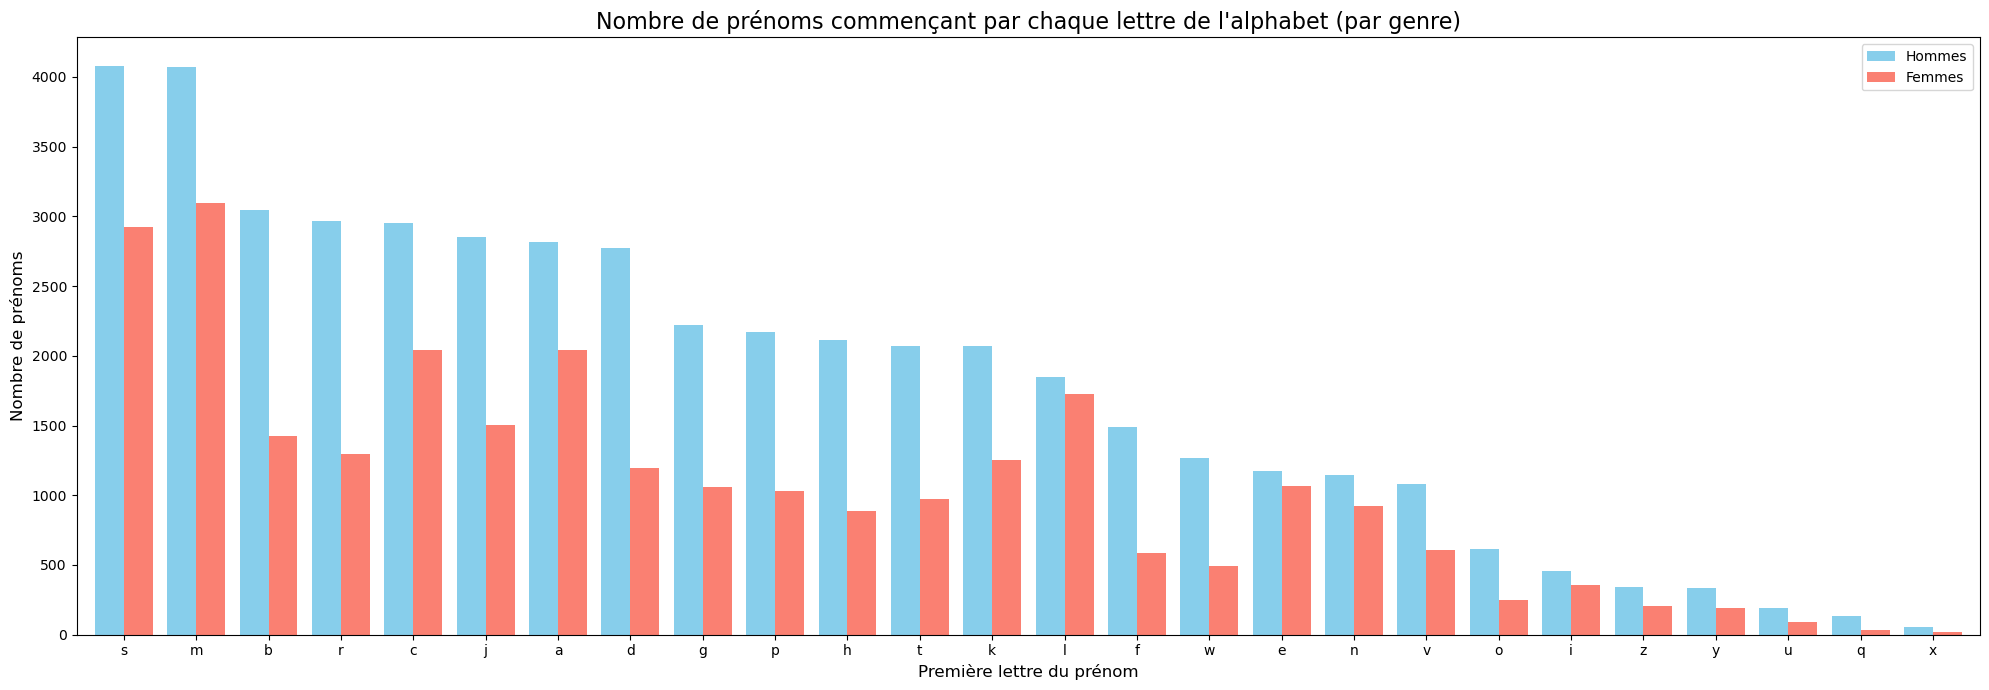

In [521]:
# Créer le graphique à barres
fig, ax = plt.subplots(figsize=(20, 7))

# Tracer les barres pour les hommes et les femmes
first_letter_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.8)

# Ajouter les titres et labels
ax.set_title('Nombre de prénoms commençant par chaque lettre de l\'alphabet (par genre)', fontsize=16)
ax.set_xlabel('Première lettre du prénom', fontsize=12)
ax.set_ylabel('Nombre de prénoms', fontsize=12)
ax.set_xticklabels(first_letter_counts.index, rotation=0)  # Garder les lettres lisibles

# Afficher la légende
ax.legend(['Hommes', 'Femmes'])

# Afficher le graphique
plt.tight_layout()
plt.show()

In [522]:
# Analyze the last letter of each name for men and women separately
kept_names['last_letter'] = kept_names['Character_name'].apply(lambda name: name[-1].lower())
last_letter_counts_H = kept_names[kept_names['Actor_gender'] == 'M']['last_letter'].value_counts()
last_letter_counts_F = kept_names[kept_names['Actor_gender'] == 'F']['last_letter'].value_counts()

# Merge the two series
last_letter_counts = pd.concat([last_letter_counts_H, last_letter_counts_F], axis=1)
last_letter_counts = last_letter_counts.head(26)
last_letter_counts.columns = ['last_letter_men', 'last_letter_women']

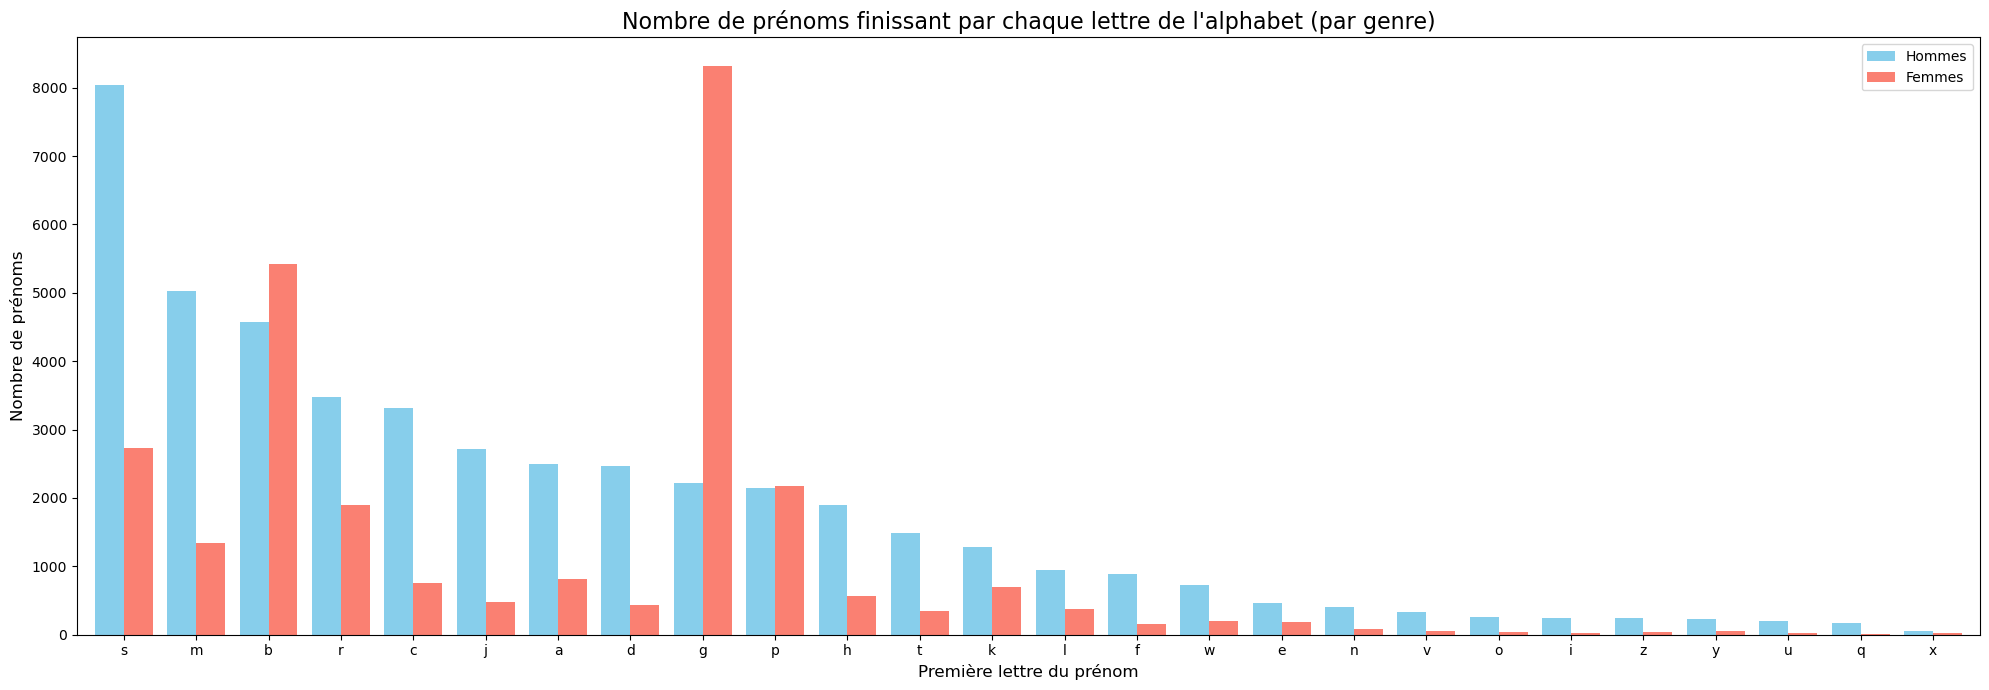

In [523]:
# Créer le graphique à barres
fig, ax = plt.subplots(figsize=(20, 7))

# Tracer les barres pour les hommes et les femmes
last_letter_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.8)

# Ajouter les titres et labels
ax.set_title('Nombre de prénoms finissant par chaque lettre de l\'alphabet (par genre)', fontsize=16)
ax.set_xlabel('Première lettre du prénom', fontsize=12)
ax.set_ylabel('Nombre de prénoms', fontsize=12)
ax.set_xticklabels(first_letter_counts.index, rotation=0)  # Garder les lettres lisibles

# Afficher la légende
ax.legend(['Hommes', 'Femmes'])

# Afficher le graphique
plt.tight_layout()
plt.show()